# **AMAZON SALES DATA ANALYSIS (EDA)**

This notebook explores Amazon sales data to uncover patterns, trends, and insights about pricing, discounts, customer behavior, and category performance.  
This dataset is having the data of 1K+ Amazon Product's as per their details listed on the official website of Amazon

# **Objectives**



* Clean and preprocess raw sales data.
* Handle missing values, duplicates, and inconsistent entries.
* Perform univariate, bivariate, and multivariate analysis.
* Identify key insights from the analysis.
* Create meaningful visualizations for better storytelling.

# **Dataset Features**:


- product_id: Product ID
- product_name: Name of the Product
- category: Category of the Product
- discounted_price: Discounted Price of the Product
- actual_price: Actual Price of the Product
- discount_percentage: Percentage of Discount
- rating: Rating of the Product
- rating_count: Number of people who voted
- about_product: Product description
- user_id: ID of the reviewer
- user_name: Name of the reviewer
- review_id: Review ID
- review_title: Short review
- review_content: Long review
- img_link: Product image link
- product_link: Official product link

# **EDA Workflow**





This analysis is structured into the following steps:

1. **Data Understanding**
   - Load the dataset
   - Explore features, info, and basic statistics  
   - Summarize dataset statistics

2. **Data Cleaning & Preparation**
   - Data type conversions
   - Duplicate removal
   - Handle missing values
   - Outliners detection
   - Describing data

3. **Univariate Analysis**
   - distribution of ratings and discount percentage
   - most frequent product categories
   - WordCloud for keywords in product name

4. **Bivariate Analysis**
   - Do higher discounts(discount_percentage) lead to higher sales (rating_count)?
   - Is there a correlation between actual price and discounted price?
   - How do ratings vary by popularity(rating_count)?

5. **Multivariate Analysis**
   - Which features are most strongly correlated?
   - Which categories show the best balance of high ratings, high discounts, and popularity?

6. **Review Analysis**
   - Explore customer reviews for common words and sentiments

7. **Key Insights & Observations**
   - Summarize findings from all the analysis

8. **Conclusion & Outcomes**

# **Importing Libraries**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from wordcloud import WordCloud

In [2]:
# Suppressing all warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Understanding**

We begin by loading the dataset and checking its dimensions and first and last few rows to understand the structure.

### **Load the dataset**


In [3]:
# Load the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Amazon EDA/amazon.csv")

In [4]:
# Set the option to show maximum columns
pd.set_option('display.max_columns', None)

### **Explore features, data types, and basic statistics**

In [5]:
# Let's have a look on top 5 rows (default) of the data
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
# Let's have a look on last 5 rows (default) of the data
data.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [7]:
# Column Names
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [8]:
# Shape of the dataset
print(f"The Number of Rows are {data.shape[0]}, and columns are {data.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [9]:
# Columns and their data types using detailed info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### **Summarize dataset statistics**

In [10]:
data.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


# **Data Cleaning & Preparation**

### **Data type conversions**

In [11]:
# Changing the Data Type of 'discounted_price' from object to float and removing symbols
data['discounted_price'] = data['discounted_price'].str.replace('₹', '')
data['discounted_price'] = data['discounted_price'].str.replace(',', '')
data['discounted_price'] = data['discounted_price'].astype(float)

In [12]:
# Changing the Data Type of 'actutal_price' from object to float and removing symbols
data['actual_price'] = data['actual_price'].str.replace('₹', '')
data['actual_price'] = data['actual_price'].str.replace(',', '')
data['actual_price'] = data['actual_price'].astype(float)

In [13]:
# Changing Data Type and values in 'discount_percentage'
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '')
data['discount_percentage'] = data['discount_percentage'].astype(float)

In [14]:
# Finding unusual 'rating'
data['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [15]:
# Check the strange row
data.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [16]:
# I got this product rating on Amazon by searching the provided product_id on their official website (amazon.in)
# The rating is 3.9. So, I am going to give the item rating a 3.9 as well.
data['rating']  = data['rating'].str.replace('|', '3.9')

In [17]:
# Changing rating column Data Type
data['rating']  = data['rating'].astype(float)

In [18]:
# Changing 'rating_count' Column Data Type
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### **Duplicate removal**

In [20]:
# FInd Duplicates
data.duplicated().any()

np.False_

In [21]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [22]:
data.duplicated(subset = ['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

np.False_

##### Hence No duplicates found

### **Handle missing values**


In [23]:
# Missing Values
data.isnull().sum().sort_values(ascending = False)

,0
rating_count,2
product_id,0
category,0
product_name,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [24]:
# Finding missing values percentage in the data
round(data.isnull().sum() / len(data) * 100 , 2).sort_values(ascending = False)

,0
rating_count,0.14
product_id,0.00
category,0.00
product_name,0.00
discounted_price,0.00
actual_price,0.00
discount_percentage,0.00
rating,0.00
about_product,0.00
user_id,0.00


In [25]:
# Find total number of missing values
data.isnull().sum().sum()

np.int64(2)

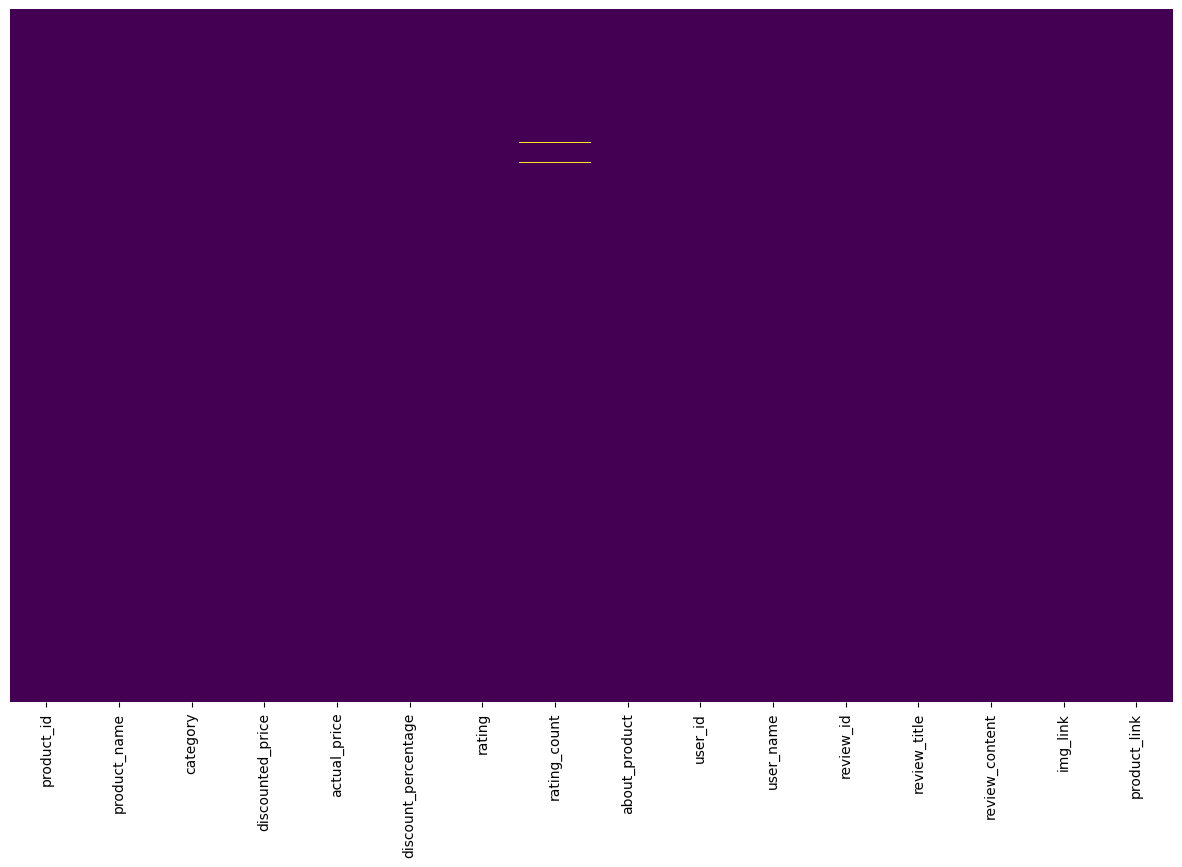

In [26]:
# Let's see missing values in a plot, Heatmap of missing values
plt.figure(figsize = (15, 9))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

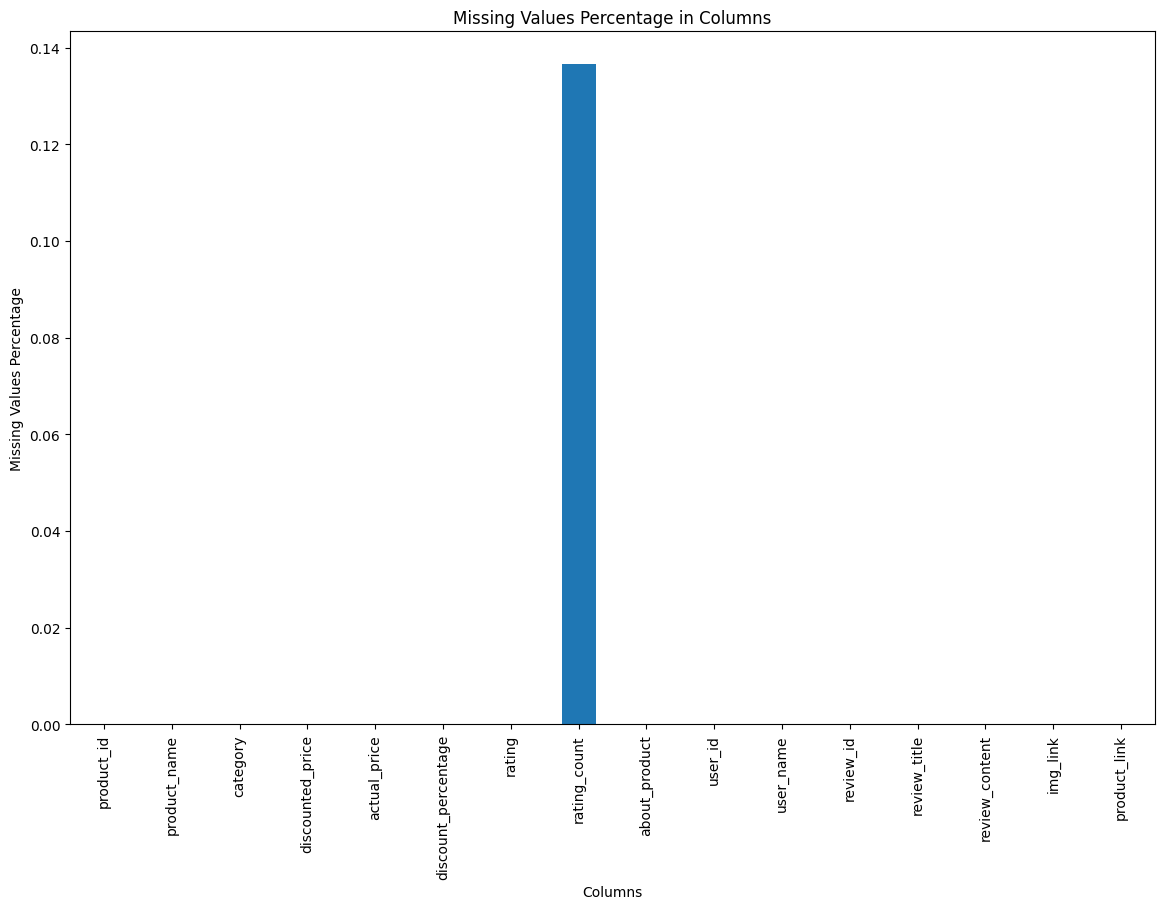

In [27]:
# Plotting missing values by percentage
plt.figure(figsize = (14, 9))
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Columns')
plt.show()

In [28]:
# Rows where there are null values in the column
data[data['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [29]:
# Impute Missing Values
data['rating_count'] = data['rating_count'].fillna(data['rating_count'].median())

In [30]:
data.isnull().sum().sort_values(ascending = False)

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


##### We have cleaned the dataset from null values

### **Outliners Detection**

In [31]:
data[data['discounted_price'] > data['actual_price']]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [32]:
data[data['rating'] > 5]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [33]:
data[data['discount_percentage'] > 100]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


<Axes: ylabel='discount_percentage'>

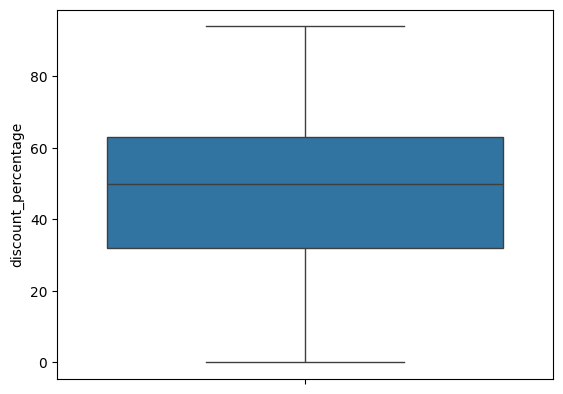

In [34]:
sns.boxplot(data['discount_percentage'])

From the above analysis we can conclude that there are no outliners in the data.

### **Describing Data**

In [35]:
# Describe summarize and describe the main characteristics of a dataset
data.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096451,18277.634812
std,6944.304394,10874.826864,21.635905,0.291620,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


# **Univariate Analysis**


First, we analyze individual features to understand their distributions.

### **Distribution of ratings and discount_percentage**

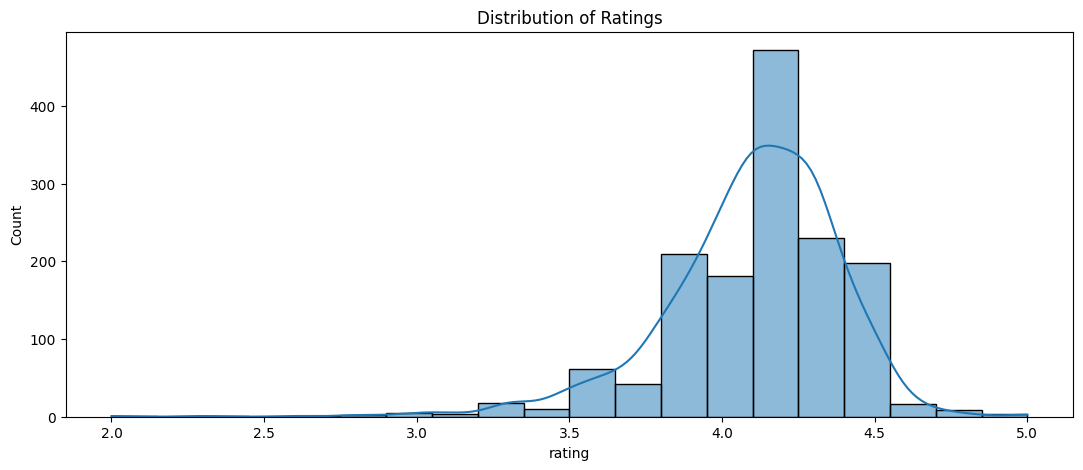

In [36]:
# Ratings distribution
plt.figure(figsize = (13, 5))
sns.histplot(data["rating"], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()

mostly ratings are between 4.0 and 4.5

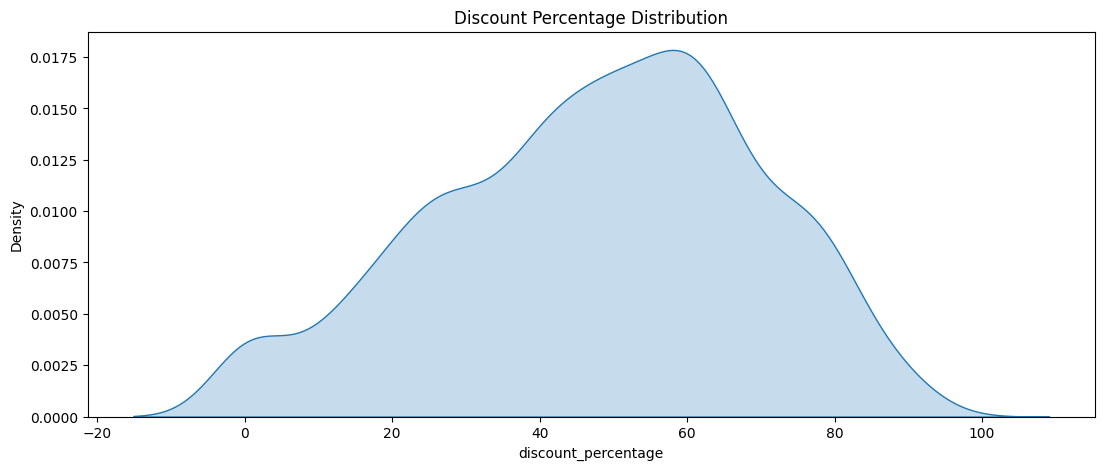

In [37]:
# Discount Percentage distribution
plt.figure(figsize = (13, 5))
sns.kdeplot(data['discount_percentage'], shade=True)
plt.title("Discount Percentage Distribution")
plt.show()

Discount on most of the products is between 50 and 60. we can say amazon is giving good discount on most of its products.

### **Most Frequent product categories**

In [38]:
# Most Frequent product categories
category_counts = data['category'].value_counts()
category_counts.head()

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


### **WordCloud for keywords in product name**

In [39]:
# Extracts cleaned keywords from a product name, keeping alphanumeric tokens
import re
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stopwords (you can expand this list manually if not using nltk)
stop_words = set(stopwords.words('english'))

def extract_keywords(product_name):
    if isinstance(product_name, str):
        tokens = re.findall(r"[a-zA-Z0-9]+", product_name.lower())                        # Use regex to split on non-alphanumeric characters
        keywords = [word for word in tokens if word not in stop_words and len(word) > 1]  #  Remove stopwords & single-letter tokens
    else:
        keywords = []
    return keywords

# Apply function
data["keywords"] = data["product_name"].apply(extract_keywords)

# Flatten list of keywords
all_keywords = [kw for kws in data["keywords"] for kw in kws]

# Count occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Top 10
print(keyword_counts.head(10))

black         530
usb           417
cable         414
charging      247
type          243
fast          212
smart         175
white         170
tv            152
compatible    146
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


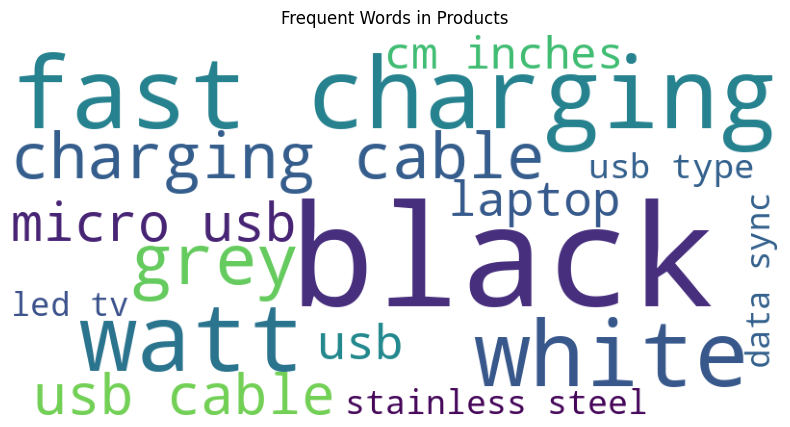

In [40]:
from wordcloud import WordCloud
# Combine text data into a single string
text = ' '.join([' '.join(kws) for kws in data['keywords']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 15).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('Frequent Words in Products')
plt.axis('off')
plt.show()

* Black color products are mostly ordered products and then white color products.
* USB, charging (especially fast charging), and cables are prominent product features.
* Cables and smart devices are likely well-represented in the dataset.
* Product names tend to be concise and use common words, potentially benefiting from refined keyword extraction techniques.

### **most popular product name?**

In [41]:
product_counts = data['product_name'].value_counts()
product_counts.head(10).sort_values(ascending = False)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.

Smart Watches and Charging Cables are the most popular product categories.

Fast charging, durability, and functionality are key features.

# **Bivariate Analysis**

### **Do higher discounts(discount_percentage) lead to higher sales (rating_count)?**

In [42]:
# Calculate Correlation Coefficient between 'Discount_percentage' and 'rating_count'
round(data['discount_percentage'].corr(data['rating_count'], method = 'spearman'), 2)

np.float64(-0.1)

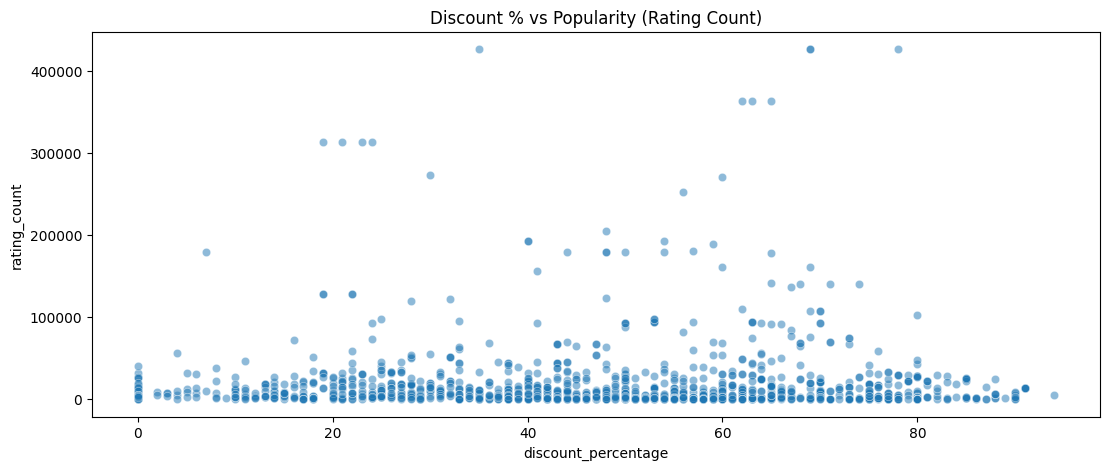

In [43]:
plt.figure(figsize = (13, 5))
sns.scatterplot(x="discount_percentage", y="rating_count", data=data, alpha=0.5)
plt.title("Discount % vs Popularity (Rating Count)")
plt.show()

Discount Percentage and higher sales(rating_count) have a negative correlation. This means As one variable goes up, the other tends to go down slightly, but the relationship is very weak and might be just random noise. we can say there is no relationship.


### **Is there a correlation between actual price and discounted price?**

In [44]:
# Calculate Correlation Coefficient between 'actutal_price' and 'discounted_price'
round(data['discounted_price'].corr(data['actual_price'], method = 'spearman'), 2)

np.float64(0.93)

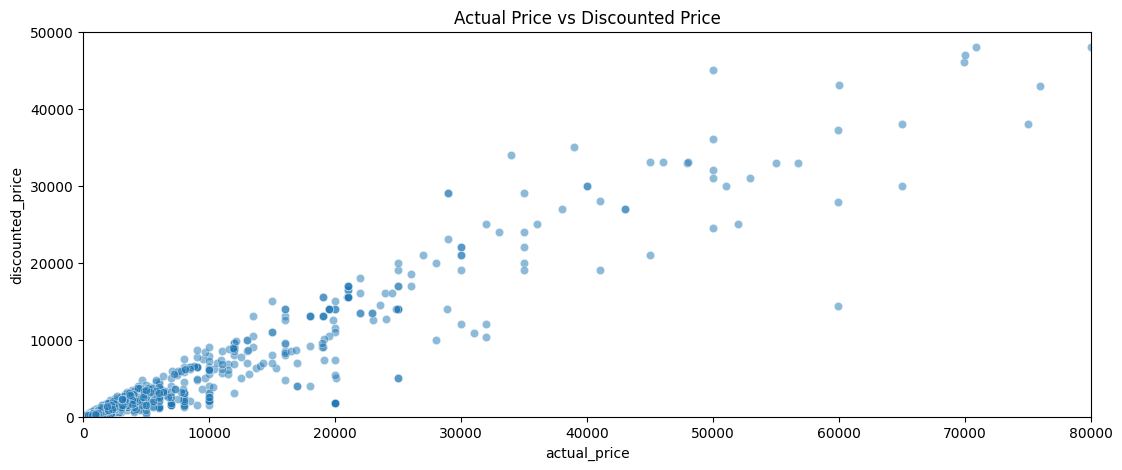

In [45]:
# Actual vs Discounted Price
plt.figure(figsize = (13, 5))
sns.scatterplot(x="actual_price", y="discounted_price", data=data, alpha=0.5)
plt.xticks(range(0, 90000, 10000))
plt.yticks(range(0, 60000, 10000))
plt.xlim(0, 80000)
plt.ylim(0, 50000)
plt.title("Actual Price vs Discounted Price")
plt.show()

Discounted price and actutal price have a 0.93 Positive correlation. This means As one variable goes up, the other goes up or vice-versa, the relationship is too strong as it is near to 1. we can say there is relationship between discounted price and actutal price.
Also most products are concentrated in the lower price brackets, indicating affordability is a key factor in the dataset.

In [46]:
discounted_price_median = data['discounted_price'].median()
print("Discounted Price Median is: ", discounted_price_median)

Discounted Price Median is:  799.0


In [47]:
actual_price_median = data['actual_price'].median()
print("Actual Price Median is: ", actual_price_median)

Actual Price Median is:  1650.0


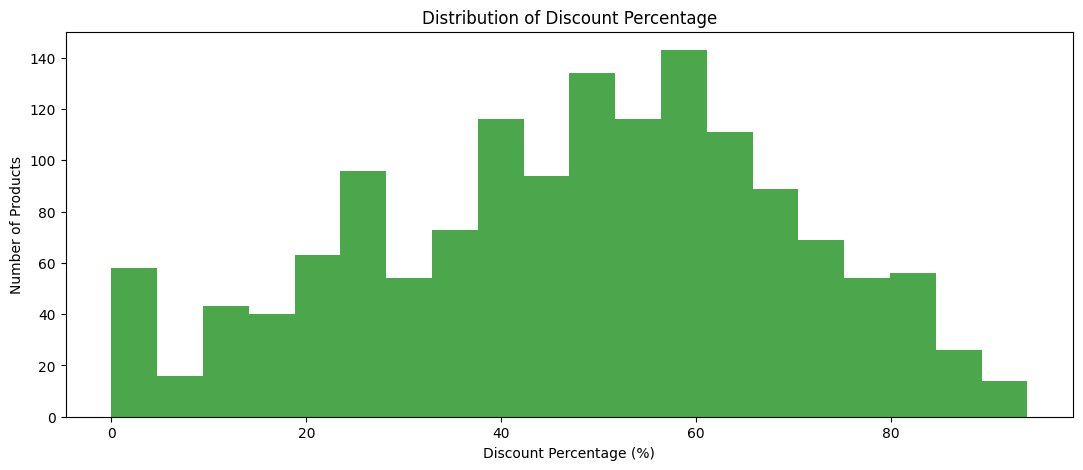

In [48]:
# Calculate and analyze discount percentages
plt.figure(figsize=(13,5))
plt.hist(data['discount_percentage'], bins=20, color='green', alpha=0.7)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Number of Products")
plt.title("Distribution of Discount Percentage")
plt.show()

In [49]:
# skewness of disocunted_percentage
data['discount_percentage'].skew()

np.float64(-0.2905318638244812)

The output shows that discounted prices are generally lower than actual prices, with a median discounted price of 799 and a median actual price of 1650.

The discount percentage distribution is skewed slightly to the left, means mostly products have higher discounts.


### **How do ratings vary by popularity(rating_count)?**

In [50]:
# Calculate Correlation Coefficient between 'rating' and 'rating_count'
round(data['rating'].corr(data['rating_count'], method = 'spearman'), 2)

np.float64(0.18)

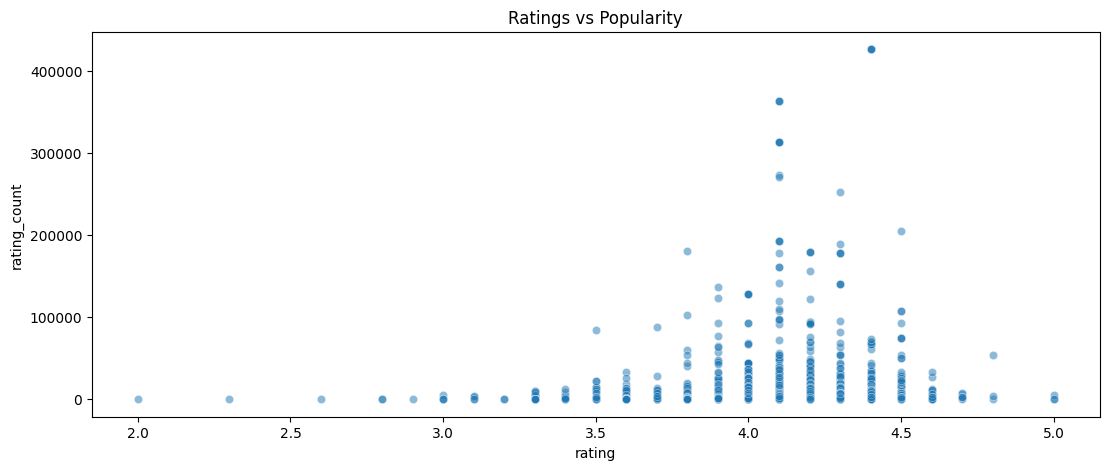

In [51]:
# Ratings vs rating count (Popularity)
plt.figure(figsize = (13, 5))
sns.scatterplot(x="rating", y="rating_count", data=data, alpha=0.5)
plt.title("Ratings vs Popularity")
plt.show()

 - rating and rating_count have a 0.18 Positive correlation. This means As one variable goes up, the other goes up or vice-versa, the relationship is not very strong as it is far away from 1. but still we can say that there is relationship between discounted price and actutal price.

 - Most products have ratings clustered between 3.5 and 5 stars, with varying popularity.

 - The spread suggests that high ratings alone do not guarantee popularity—some well-rated products have low engagement, while others with similar ratings attract thousands of reviews.

 - Popular products tend to maintain ratings above 4.0, suggesting that strong quality helps sustain customer interest.

### **Actual Price vs Rating**
This scatter plot shows the relationship between a product’s actual price (x-axis) and its customer rating (y-axis).
Each point represents a product.


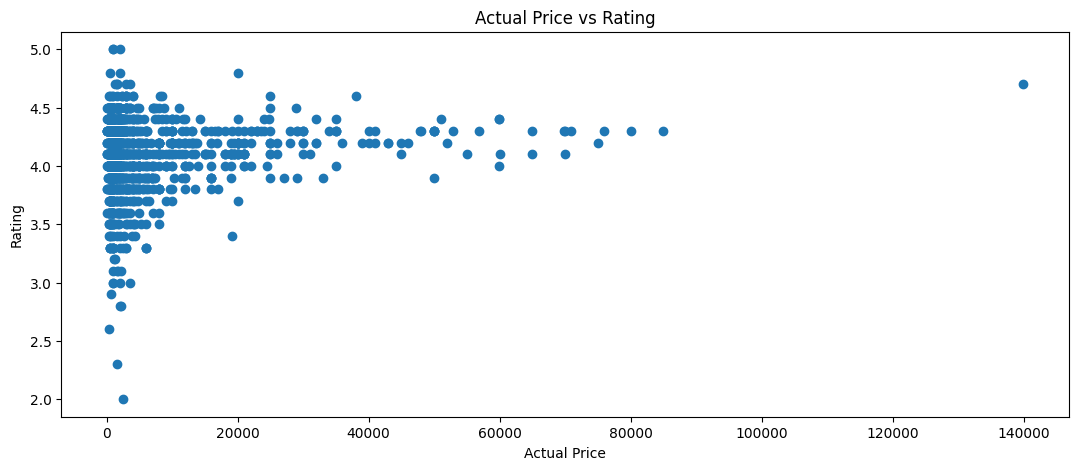

In [52]:
# Scatter Plot
# Plotting actual_price vs rating
plt.figure(figsize=(13, 5))
plt.scatter(data['actual_price'], data['rating'])
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Actual Price vs Rating')
plt.show()

Most products are concentrated in the lower price range between 0 to 25000, with ratings between 3.5 to 5.

Higher-priced products are fewer, but they generally maintain similar rating patterns.

This suggests that price does not have a strong direct correlation with product rating—customers rate products more on quality and experience rather than just price.

# **Multivariate Analysis**

Study interactions among multiple variables using correlation heatmaps and grouped analysis.  

### **Which features are most strongly correlated?**

                     discounted_price  actual_price  discount_percentage  \
discounted_price                 1.00          0.96                -0.24   
actual_price                     0.96          1.00                -0.12   
discount_percentage             -0.24         -0.12                 1.00   
rating                           0.12          0.12                -0.15   
rating_count                    -0.03         -0.04                 0.01   

                     rating  rating_count  
discounted_price       0.12         -0.03  
actual_price           0.12         -0.04  
discount_percentage   -0.15          0.01  
rating                 1.00          0.10  
rating_count           0.10          1.00  


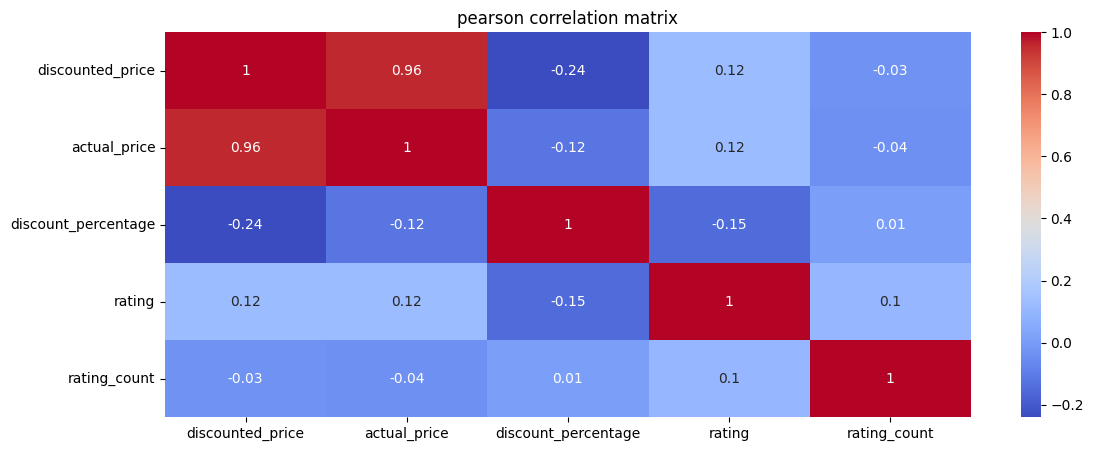

In [53]:
# Calculating pearson Correlation Coefficients (for linear relationships)
pearson_correlation_matrix = round(data.corr(numeric_only=True),2)
print(pearson_correlation_matrix)

# Create a Heatmap to visualize the correlations
plt.figure(figsize=(13, 5))
sns.heatmap(pearson_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("pearson correlation matrix")
plt.show()

                     discounted_price  actual_price  discount_percentage  \
discounted_price                 1.00          0.93                -0.37   
actual_price                     0.93          1.00                -0.07   
discount_percentage             -0.37         -0.07                 1.00   
rating                           0.08          0.03                -0.14   
rating_count                     0.12          0.09                -0.10   

                     rating  rating_count  
discounted_price       0.08          0.12  
actual_price           0.03          0.09  
discount_percentage   -0.14         -0.10  
rating                 1.00          0.18  
rating_count           0.18          1.00  


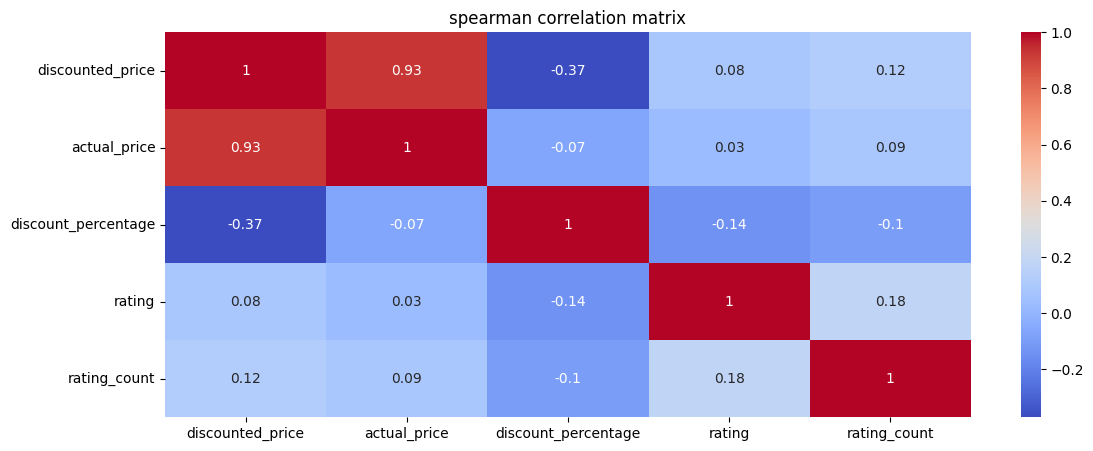

In [54]:
# Calculating Spearman Correlation Coefficients (for non-linear relationships)
spearman_correlation_matrix = round(data.corr(method = "spearman", numeric_only=True),2)
print(spearman_correlation_matrix)

# Create a Heatmap to visualize the correlations
plt.figure(figsize=(13, 5))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("spearman correlation matrix")
plt.show()



#### **Correlation of Whole Data**

**When we want to run correlation analysis, we need numeric data only. Since most of our original dataset has text and categorical variables.
If we want to analysis whole data correlations we can make a copy of original dataset (after cleaning) and then we can apply LabelEncoder on non-numeric columns, so that original Data won't be affected for other analysis.
Below cell conatins all codes for pearson and spearman correlation, to uncomment select everthing in cell and then press Ctrl + / (Windows/Linux) or Command + / (macOS) and run**


In [55]:
# # Creating a deep copy of Original Dataset
# data_copy = data.copy()

# from sklearn.preprocessing import LabelEncoder
# # label encode categorical variables
# # LabelEncoder converts unique values in a column into integers

# data_copy['product_id'] = LabelEncoder().fit_transform(data_copy['product_id'])
# data_copy['category'] = LabelEncoder().fit_transform(data_copy['category'])
# data_copy['review_id'] = LabelEncoder().fit_transform(data_copy['review_id'])
# data_copy['review_content'] = LabelEncoder().fit_transform(data_copy['review_content'])
# data_copy['product_name'] = LabelEncoder().fit_transform(data_copy['product_name'])
# data_copy['user_name'] = LabelEncoder().fit_transform(data_copy['user_name'])
# data_copy['about_product'] = LabelEncoder().fit_transform(data_copy['about_product'])
# data_copy['user_id'] = LabelEncoder().fit_transform(data_copy['user_id'])
# data_copy['review_title'] = LabelEncoder().fit_transform(data_copy['review_title'])
# data_copy['img_link'] = LabelEncoder().fit_transform(data_copy['img_link'])
# data_copy['product_link'] = LabelEncoder().fit_transform(data_copy['product_link'])

# # Calculating Pearson Correlation Coefficients (Default in Pandas)
# correlation_matrix = round(data_copy.corr(),2)
# print(correlation_matrix)

# # Create a Heatmap to visualize the correlations
# plt.figure(figsize=(13, 5))
# sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
# plt.title("Correlation Matrix (Pearson)")
# plt.show()

# # Calculating Spearman Correlation Coefficients (for non-linear relationships)
# spearman_correlation_matrix = round(data_copy.corr(method = "spearman"),2)
# print(spearman_correlation_matrix)

# # Create a Heatmap to visualize the correlations
# plt.figure(figsize=(13, 5))
# sns.heatmap(spearman_correlation_matrix, annot = True, cmap = "coolwarm")
# plt.title("Correlation Matrix (Spearman)")
# plt.show()

### **Which categories show the best balance of high ratings, high discounts, and popularity?**

In [56]:
data.groupby("category")[["discount_percentage","rating","rating_count"]].mean().sort_values("rating_count", ascending=False).reset_index().head(10)

,category,discount_percentage,rating,rating_count
0,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,60.000000,4.100000,270563.000000
1,Computers&Accessories|NetworkingDevices|Networ...,33.000000,4.300000,95116.000000
2,Electronics|Accessories|MemoryCards|MicroSD,58.846154,4.330769,85660.923077
3,"Electronics|Headphones,Earbuds&Accessories|Hea...",58.269231,3.898077,80864.211538
4,"Electronics|HomeTheater,TV&Video|Accessories|C...",59.791667,4.254167,79418.916667
5,Computers&Accessories|ExternalDevices&DataStor...,56.900000,4.260000,77474.400000
6,Computers&Accessories|NetworkingDevices|Repeat...,54.333333,4.200000,74123.666667
7,Electronics|Accessories|MemoryCards|SecureDigi...,44.000000,4.400000,69585.000000
8,"Electronics|Headphones,Earbuds&Accessories|Hea...",52.375000,4.062500,67858.750000
9,Electronics|Mobiles&Accessories|Smartphones&Ba...,18.555556,3.911111,61139.888889


# **Review Analysis**

### **Explore customer reviews for common words and sentiments**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


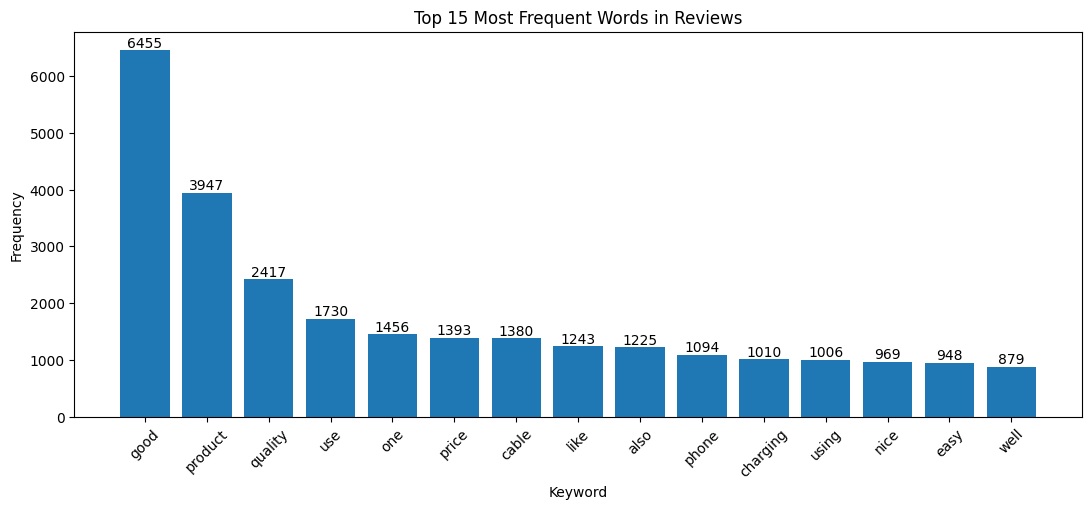

In [57]:
# Extracts cleaned keywords from a review_content, keeping alphanumeric tokens
import re
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stopwords (you can expand this list manually if not using nltk)
stop_words = set(stopwords.words('english'))

def extract_keywords(review_content):
    if isinstance(review_content, str):
        tokens = re.findall(r"[a-zA-Z0-9]+", review_content.lower())                        # Use regex to split on non-alphanumeric characters
        keywords = [word for word in tokens if word not in stop_words and len(word) > 1]  #  Remove stopwords & single-letter tokens
    else:
        keywords = []
    return keywords

# Apply function
data["keywords"] = data["review_content"].apply(extract_keywords)

# Flatten list of keywords
all_keywords = [kw for kws in data["keywords"] for kw in kws]

# Count occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Plotting Top 15 Most Frequent Words in Reviews
plt.figure(figsize=(13, 5))
bars = plt.bar(keyword_counts.index[:15], keyword_counts.values[:15])
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("Top 15 Most Frequent Words in Reviews")
# Adding frequency labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,   # Position
             str(height),                               # Label text
             ha='center', va='bottom', fontsize=10)     # Alignment
plt.show()

This bar chart displays the 15 most common keywords extracted from customer reviews after cleaning and removing stopwords. The x-axis shows keywords, and the y-axis shows how many times each keyword appears across all reviews.

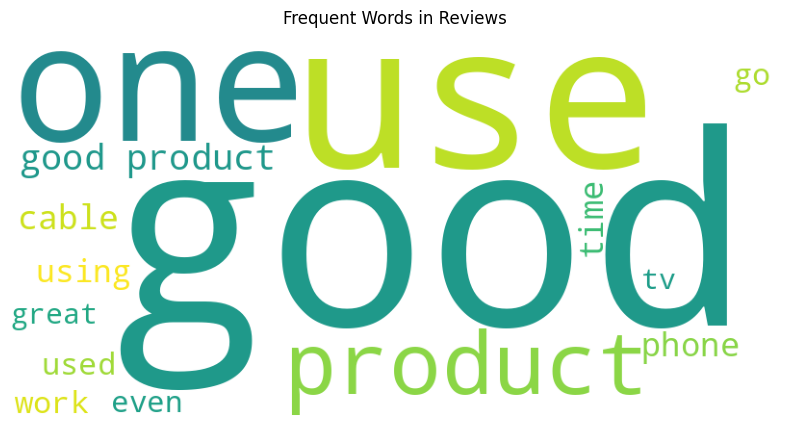

In [58]:
from wordcloud import WordCloud
# Combine text data into a single string
text = ' '.join([' '.join(kws) for kws in data['keywords']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = 15).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title('Frequent Words in Reviews')
plt.axis('off')
plt.show()

# **Key Insights & Observations**

**Summarize findings from all the above analysis**

**Price:**
* Most products are concentrated in the lower price range between 0 to 25000, indicating affordability is a key factor in the dataset.
*	Price does not have a strong direct correlation with product rating—customers rate products more on quality and experience rather than just price.

**Products:**
* Most products have ratings between 4 to 4.5.
*	Black color products are mostly ordered products and then white color products.
*	Smart Watches and Charging Cables are the most popular product categories. Fast charging, durability, and functionality are key features.
*	Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.

**Discount Percentage:**
* Discount percentage on most of the products is between 50% and 60%. we can say mostly products have higher discounts.
* Discount Percentage and rating & Sales(rating_count) have a negative correlation. This means as one variable goes up, the other tends to go down slightly, but the relationship is very weak. This means customers rate products more on quality and experience rather than just price.

**Ratings & Review:**
* High ratings alone do not guarantee popularity(rating_count) —some well-rated products have low engagement, while others with similar ratings attract thousands of reviews.
* The most frequent terms represent what customers talk about the most (e.g., good, product quality, price, delivery, usability).


# **Conclusion**




- Dataset was cleaned and preprocessed successfully.
- Performed univariate, bivariate, and multivariate analysis.
- Generated actionable insights on pricing, discounts, ratings, and categories.
- Set foundation for predictive modeling (sales forecasting, recommendation).
 - By conducting exploratory data analysis (EDA) on this dataset, businesses can gain valuable insights that can help them make better decisions about their products, marketing, and operations.